# Assigment 01 - Computer Vision
## Point based Image Processing
NIM : 2440016804

Nama : Rio Pramana

Kelas : LA01

I installed opencv first because I do not have it installed yet on this device

In [160]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


After every library is installed, we import them
In this code, I am using opencv (cv2), numpy, and pyplot from matplotlib

In [161]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Loading the image**

The first step is to load the image using cv2.imread, and then save its shape on *row* & *column* variable

In [162]:
# Load image from files
img = cv2.imread('./low_contrast.png',0)
# Save width and height of the image
row, column = img.shape

Before we transform the image, we need to show the image and its histogram so we know the intensity values that we want to work on

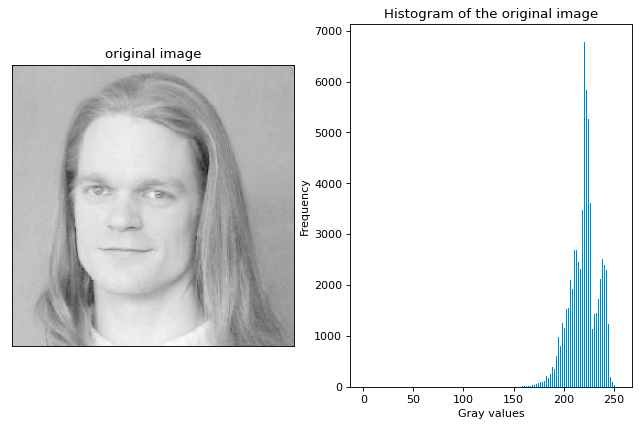

In [163]:
#Calculate histogram of img
hist = cv2.calcHist([img],[0],None,[256],[0,256])

#Plot the original image on the left
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.imshow(img, cmap="gray")
plt.title('original image')
plt.grid(False), plt.xticks([]), plt.yticks([])

#Plot the histogram on the right
plt.subplot(122)
plt.bar(range(256), hist.ravel())
plt.title('Histogram of the original image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')
plt.show()

**Transforming the image (first approach)**

Based on question 1(A), there are 2 approach for intensity level scaling. The first one will be based on the first figure/image of the question where we highlight a certain range of intensities, then we set the rest (that fall outside of the range) to a lower level (in this case i will set it to 0)

In [164]:
# Create a zeros array to store the sliced image
img_1st_approach = np.zeros((row,column),dtype = 'uint8')

# Specify the min and max range
# Based on the histogram above, I want to highlight the range of 230-255 (the face of the guy)
min_range = 230
max_range = 255

# Loop over the input image, if pixel value is in between the desired range, set it to 255, otherwise set it to 0
for i in range(row):
    for j in range(column):
        if img[i,j] > min_range and img[i,j] < max_range:
            img_1st_approach[i,j] = 255 #Highlight this pixel
        else: #Otherwise:
            img_1st_approach[i,j] = 0

**Displaying the transformed image and its histogram**

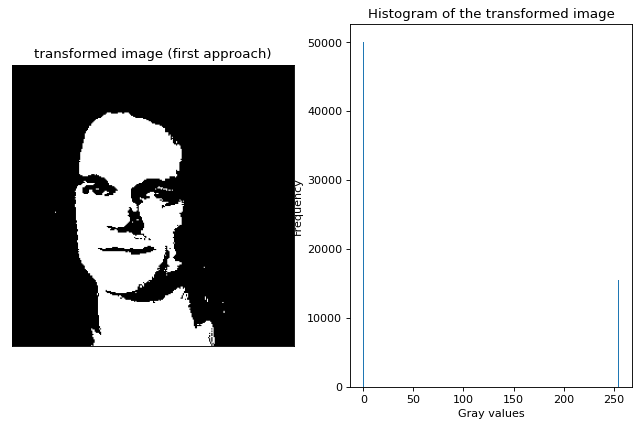

In [165]:
#Calculate histogram of transformed image (1st approach)
hist = cv2.calcHist([img_1st_approach],[0],None,[256],[0,256])

#Plot the original image on the left
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.imshow(img_1st_approach, cmap="gray")
plt.title('transformed image (first approach)')
plt.grid(False), plt.xticks([]), plt.yticks([])

#Plot the histogram on the right
plt.subplot(122)
plt.bar(range(256), hist.ravel())
plt.title('Histogram of the transformed image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')
plt.show()

As we can see above, we have highlighted the face of the guy by setting its value to 255
The rest of the picture (hair, background, etc.) has been set to 0

**Transforming the image (second approach)**

The second approach is based on the second picture given in question 1(A)

We are highlighting a certain area of the picture (based on a specific range), but we do not touch the intensity of the rest of the picture (intensity outside of the range stay as it is)

In [166]:
# Create an zeros array to store the sliced image
img_2nd_approach = np.zeros((row,column),dtype = 'uint8')

# Specify the min and max range
# The same as before
min_range = 230
max_range = 255

# Loop over the input image, if pixel value is in between the desired range, set it to 255, otherwise set it to 0
for i in range(row):
    for j in range(column):
        if img[i,j]>min_range and img[i,j]<max_range:
            img_2nd_approach[i,j] = 255 #Highlight this pixel
        else: #Otherwise, make it the same as before
            img_2nd_approach[i,j] = img[i,j]

**Displaying the second transformed image and its histogram**

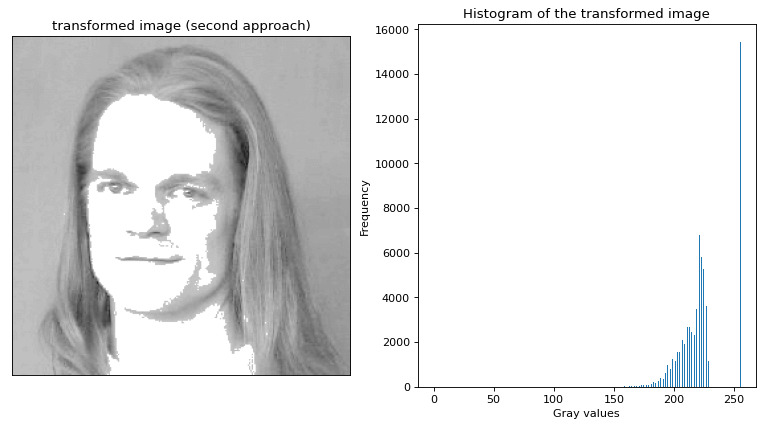

In [167]:
#Calculate histogram of transformed image (2nd approach)
hist = cv2.calcHist([img_2nd_approach],[0],None,[256],[0,256])

#Plot the original image on the left
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.imshow(img_2nd_approach, cmap="gray")
plt.title('transformed image (second approach)')
plt.grid(False), plt.xticks([]), plt.yticks([])

#Plot the histogram on the right
plt.subplot(122)
plt.bar(range(256), hist.ravel())
plt.title('Histogram of the transformed image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')
plt.show()

As we can see above, we have successfully achieved the second approach's objective, which is to brightens a certain area of the picture, in this case it is the guy's face